# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [160]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import (
    cross_val_score,
)  # will be used to separate training and test

iris = load_iris()
clf = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=5,
    class_weight={0: 1, 1: 1, 2: 1},
)
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(
    clf, iris.data, iris.target, cv=5
)  # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [161]:
from sklearn import neighbors

n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(
    clf_knn, iris.data, iris.target, cv=5
)  # score will be the accuracy
print(scores)
# shows the model predictions
for i in range(len(iris.target)):
    instance = (iris.data[i, :]).reshape(1, -1)
    predicted = clf_knn.predict(instance)[0]
    if iris.target[i] == predicted:
        continue
        # print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(
            str(i)
            + " nok "
            + "true class: "
            + str(iris.target_names[iris.target[i]])
            + "; predicted: "
            + str(iris.target_names[predicted])
        )

[0.93333333 1.         1.         0.96666667 1.        ]
77 nok true class: versicolor; predicted: virginica
83 nok true class: versicolor; predicted: virginica
106 nok true class: virginica; predicted: versicolor
138 nok true class: virginica; predicted: versicolor


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [162]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance = (iris.data[i, :]).reshape(1, -1)
    predicted2 = clf_knn2.predict(instance)[0]
    if iris.target[i] == predicted2:
        continue
        # print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(
            str(i)
            + " nok "
            + "true class: "
            + str(iris.target_names[iris.target[i]])
            + "; predicted: "
            + str(iris.target_names[predicted])
        )
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(
    clf_knn2, iris.data, iris.target, cv=5, scoring="accuracy"
)  # score will be the accuracy
print(scores2)

Classification score of k-nn with distance weighting
[0.96666667 1.         1.         0.96666667 1.        ]


The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.91666666

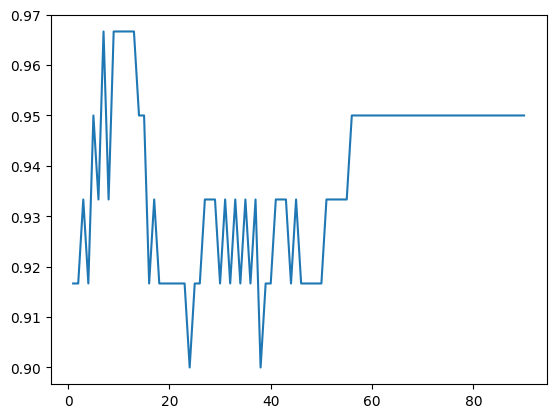

In [163]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris

iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0
)

best_accuracy = 0
best_k = 1
A = np.zeros(len(y_train))  # for storing accuracies
for n_neighbors in np.arange(1, len(y_train) + 1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights="distance")
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index = n_neighbors - 1
    A[index] = clf_knn3.score(X_test, y_test)
    if best_accuracy < clf_knn3.score(X_test, y_test):
        best_accuracy = clf_knn3.score(X_test, y_test)
        best_k = n_neighbors
    print("k neighbors=" + str(n_neighbors))
    print("accuracy=" + str(clf_knn3.score(X_test, y_test)))

print("\n")
print("best k=" + str(best_k))
print("best accuracy=" + str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0, 1.0, 0.01))

plt.plot(np.arange(1, len(y_train) + 1), A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k n

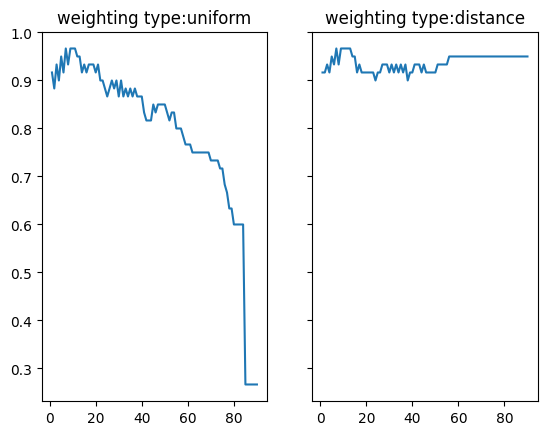

In [164]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris

iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0
)

i = 0  # parameter in the control of the subplot to draw on'
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ["uniform", "distance"]:
    print("weighting:" + str(weight_type))
    A = np.zeros(len(y_train))  # for storing accuracies
    best_accuracy = 0
    best_k = 1
    for n_neighbors in np.arange(1, len(y_train) + 1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index = n_neighbors - 1
        A[index] = clf_knn2.score(X_test, y_test)
        if best_accuracy < clf_knn2.score(X_test, y_test):
            best_accuracy = clf_knn2.score(X_test, y_test)
            best_k = n_neighbors
        print("k neighbors=" + str(n_neighbors))
        print("accuracy=" + str(clf_knn2.score(X_test, y_test)))

    print("\n")
    print("best k=" + str(best_k))
    print("best accuracy=" + str(best_accuracy))
    if i == 0:
        ax1.plot(np.arange(1, len(y_train) + 1), A)
        ax1.set_title("weighting type:" + str(weight_type))
    else:
        ax2.plot(np.arange(1, len(y_train) + 1), A)
        ax2.set_title("weighting type:" + str(weight_type))
    i = i + 1

plt.show()

In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)


 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

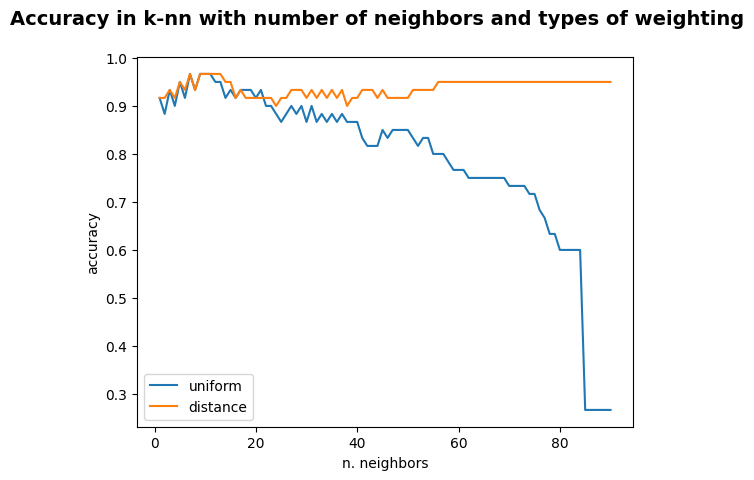

In [165]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris

iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0
)

fig = plt.figure()
fig.suptitle(
    "Accuracy in k-nn with number of neighbors and types of weighting",
    fontsize=14,
    fontweight="bold",
)
ax = fig.add_subplot(111)
ax.set_xlabel("n. neighbors")
ax.set_ylabel("accuracy")

# 2 arrays for storing accuracies for each type of weigthing
A = np.zeros((len(y_train), 2))

i = 0  # parameter in the control of the different diagram (=matrix A column index)
best_accuracy = 0
for weight_type in ["uniform", "distance"]:
    print("\n weighting:" + str(weight_type))
    best_accuracy = 0
    best_k = 1
    for n_neighbors in np.arange(1, len(y_train) + 1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index = n_neighbors - 1  # computes the matrix row index
        A[index, i] = clf_knn2.score(X_test, y_test)
        if best_accuracy < clf_knn2.score(X_test, y_test):
            best_accuracy = clf_knn2.score(X_test, y_test)
            best_k = n_neighbors
        print("k neighbors=" + str(n_neighbors))
        print("accuracy=" + str(clf_knn2.score(X_test, y_test)))

    print("\n")
    print("best k=" + str(best_k))
    print("best accuracy=" + str(best_accuracy))
    plt.plot(np.arange(1, len(y_train) + 1), A[:, i])
    i = i + 1
plt.legend(["uniform", "distance"], loc="lower left")
plt.show()

Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.


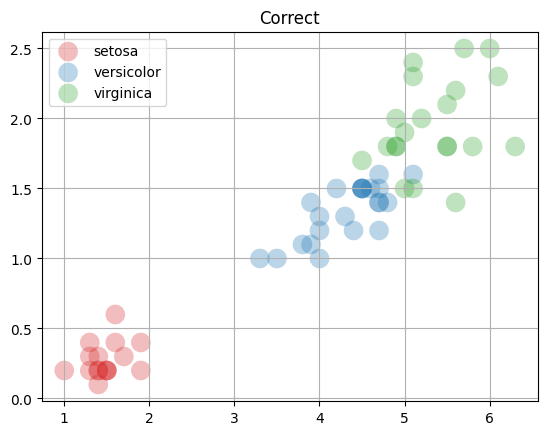

In [166]:
import matplotlib.pyplot as plt

def plot_scatter_colored(X_test, y_test, title):
    color_to_classes = {
        'tab:red': 0,
        'tab:blue': 1,
        'tab:green': 2
    }
    color_to_names = {
        'tab:red': "setosa",
        'tab:blue': "versicolor",
        'tab:green': "virginica"
    }

    fig, ax = plt.subplots()
    for color in ['tab:red', 'tab:blue', 'tab:green']:
        
        x = []
        y = []
        for (x_iris,y_iris) in zip(X_test, y_test):
            if color_to_classes[color]==y_iris:
                x.append(x_iris[2]) # Using this because we saw it reduces entropy in the decision tree from Ex1
                y.append(x_iris[3]) # Using this because we saw it reduces entropy in the decision tree from Ex1
        scale = 200.0 #* np.random.rand(n)
        ax.scatter(x, y, c=color, s=scale, label=color_to_names[color],
                alpha=0.3, edgecolors='none')

    ax.legend()
    ax.grid(True)

    plt.title(title)
    plt.show()

plot_scatter_colored(X_test, y_test, "Correct")

Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


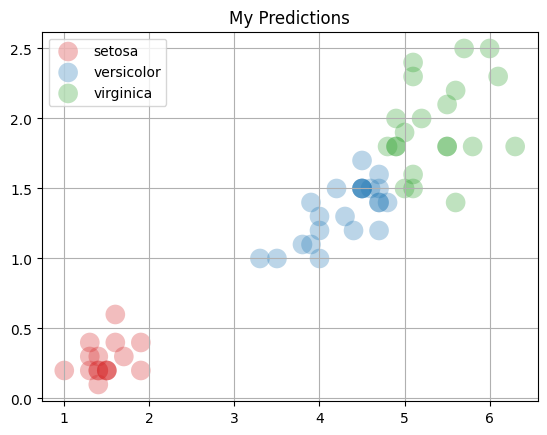

In [167]:
my_clf_knn = neighbors.KNeighborsClassifier(n_neighbors=7)

my_clf_knn.fit(X_train, y_train)
my_y_preds = my_clf_knn.predict(X_test)
plot_scatter_colored(X_test, my_y_preds, "My Predictions")


In the following, extend the above exercize on k-nn using a kernel function for the distances computation. Use a Gaussian kernel, centered around the data point, with a standard deviation sigma that must be tuned to the best value.

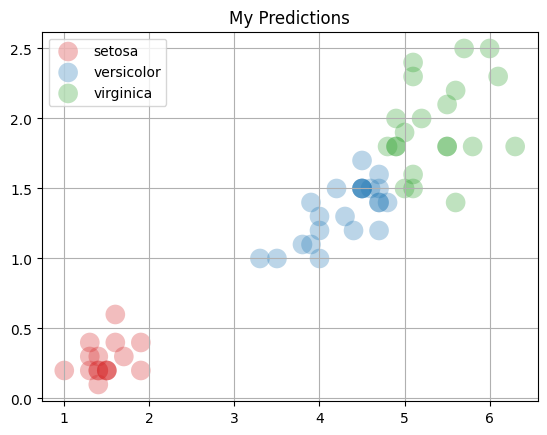

In [181]:
import math
import statistics

def kernel(distances):
    ret = []
    for i in range(len(distances)):
        distance = gaussian(distances[i], sigma=4)
        ret.append(distance)
    return ret

def gaussian_single(d, sigma, mean):
    return 1/(sigma*2*math.pi)*math.exp(-0.5*((d - mean)**2)/(sigma**2))

def gaussian(distances, sigma):
    mean = statistics.mean(distances)
    return [ gaussian_single(d, sigma, mean) for d in distances]

gaussian_kernel_knn = neighbors.KNeighborsClassifier(n_neighbors=7, weights=kernel)

gaussian_kernel_knn.fit(X_train, y_train)
my_y_preds = gaussian_kernel_knn.predict(X_test)
plot_scatter_colored(X_test, my_y_preds, "My Predictions")